In [ ]:
!pip install pyspark


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import matplotlib.pyplot as plt
import IPython
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('yelp-spark').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/21 19:21:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
reviews = spark.read.json('BigData_Project Dataset/yelp_academic_dataset_review.json')
businesses = spark.read.json('BigData_Project Dataset/yelp_academic_dataset_business.json')


22/12/21 19:21:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
rc = reviews.join(businesses, reviews.business_id == businesses.business_id, "left").drop(businesses.stars)

In [ ]:
rc.show(10)

+---------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+
|_corrupt_record|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|         city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|state|
+---------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----

In [ ]:
import pyspark.sql.functions as f
rc = rc.withColumn('wordCount', f.size(f.split(f.col('text'), ' ')))

In [ ]:
from pyspark.sql.functions import col
rc.filter(col("categories").like("%Restaurants%")).select('name' , 'categories', 'text', 'wordCount', 'stars').show(10)

+--------------------+--------------------+--------------------+---------+-----+
|                name|          categories|                text|wordCount|stars|
+--------------------+--------------------+--------------------+---------+-----+
|Turning Point of ...|Restaurants, Brea...|If you decide to ...|      101|  3.0|
|   Kettle Restaurant|Restaurants, Brea...|Family diner. Had...|       55|  3.0|
|               Zaika|Halal, Pakistani,...|Wow!  Yummy, diff...|       48|  5.0|
|                Melt|Sandwiches, Beer,...|Cute interior and...|       94|  4.0|
|            Dmitri's|Mediterranean, Re...|I am a long term ...|       65|  1.0|
|     Fries Rebellion|Beer Bar, Bars, A...|Amazingly amazing...|       27|  5.0|
|Hibachi Steak Hou...|Steakhouses, Sush...|Had a party of 6 ...|       99|  3.0|
|           Milktooth|Beer, Wine & Spir...|Locals recommende...|       19|  4.0|
| Brio Italian Grille|Bars, Pizza, Nigh...|Love going here f...|       47|  4.0|
|           LaScala's|Pizza,

In [ ]:
# x = rc.filter(col("categories").like("%Restaurants%")).select('name' , 'categories', 'text', 'wordCount', 'stars')
x = rc.select('name' , 'categories', 'text', 'wordCount', 'stars', 'city', 'postal_code', 'state')

### for each star review(1-5), we show the number of reviews for each unique word count

In [ ]:
x_star1 = x.filter(x.stars == 1.0).groupBy("wordCount").count().orderBy(col('count').desc())
x_star1 = x_star1.toPandas()


,wordCount,count
0,48,187
1,40,185
2,46,182
3,53,180
4,52,170
...,...,...
742,947,1
743,755,1
744,643,1
745,521,1


<AxesSubplot:xlabel='wordCount'>

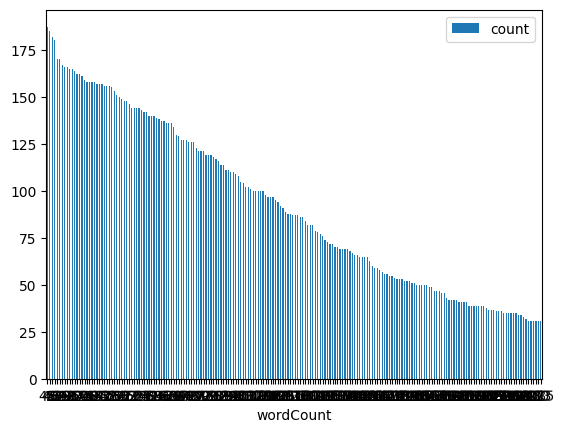

In [ ]:
x_star1.head(200).plot.bar(x = 'wordCount', y = 'count', rot = 1)

In [ ]:
# from pyspark.sql.functions import col
# df.select(col("wordCount").show(10)
# x = x_star1.select('wordCount')
# y = x_star1.select('count')

SyntaxError: unexpected EOF while parsing (4232132275.py, line 4)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

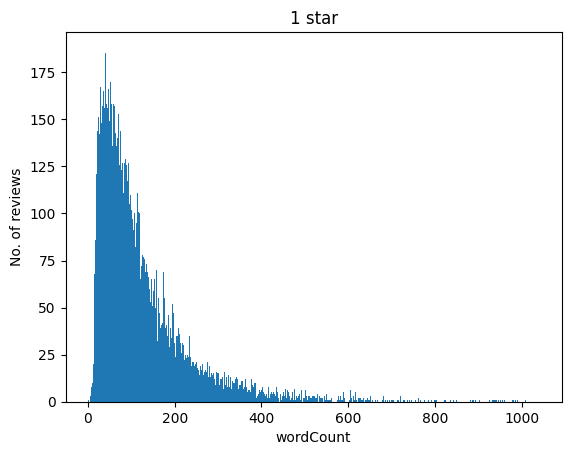

In [ ]:
x_star1['wordCount'] = x_star1['wordCount'].astype(float)
x_star1['count'] = x_star1['count'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star1['wordCount'], x_star1['count'], width=1, linewidth = 0.9)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('1 star')
plt.xlabel('wordCount')
plt.ylabel('No. of reviews')

plt.show()

In [ ]:
x_star2 = x.filter(x.stars == 2.0).groupBy("wordCount").count().orderBy(col('count').desc())
x_star2 = x_star2.toPandas()

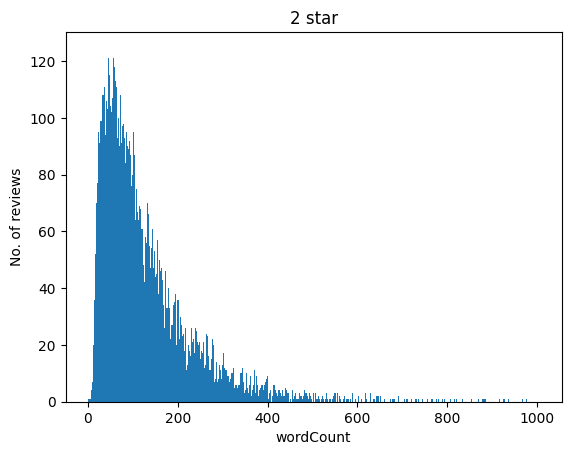

In [ ]:
x_star2['wordCount'] = x_star2['wordCount'].astype(float)
x_star2['count'] = x_star2['count'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star2['wordCount'], x_star2['count'], width=1, linewidth = 0.9)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('2 star')
plt.xlabel('wordCount')
plt.ylabel('No. of reviews')

plt.show()

In [ ]:
x_star3 = x.filter(x.stars == 3.0).groupBy("wordCount").count().orderBy(col('count').desc())
x_star3 = x_star3.toPandas()

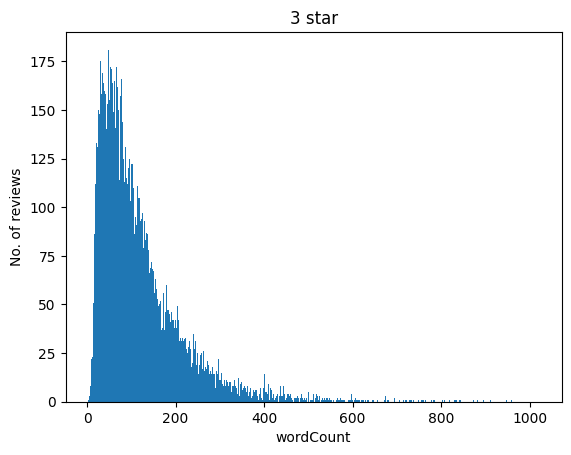

In [ ]:
x_star3['wordCount'] = x_star3['wordCount'].astype(float)
x_star3['count'] = x_star3['count'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star3['wordCount'], x_star3['count'], width=1, linewidth = 0.9)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('3 star')
plt.xlabel('wordCount')
plt.ylabel('No. of reviews')

plt.show()

In [ ]:
x_star4 = x.filter(x.stars == 4.0).groupBy("wordCount").count().orderBy(col('count').desc())
x_star4 = x_star4.toPandas()

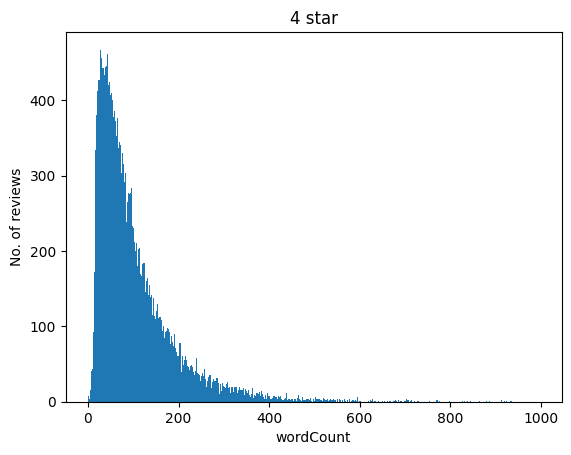

In [ ]:
x_star4['wordCount'] = x_star4['wordCount'].astype(float)
x_star4['count'] = x_star4['count'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star4['wordCount'], x_star4['count'], width=1, linewidth = 0.9)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('4 star')
plt.xlabel('wordCount')
plt.ylabel('No. of reviews')

plt.show()

In [ ]:
x_star5 = x.filter(x.stars == 5.0).groupBy("wordCount").count().orderBy(col('count').desc())
x_star5 = x_star5.toPandas()

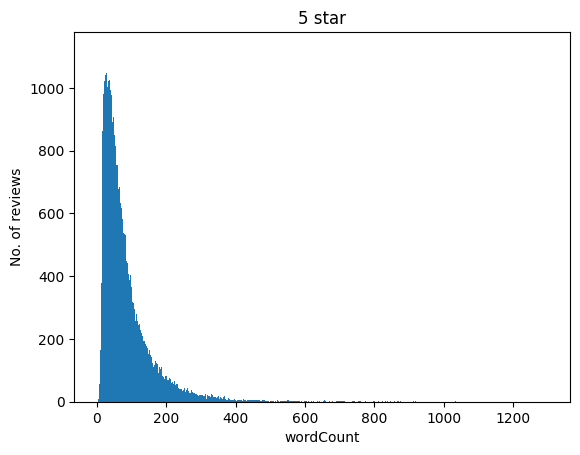

In [ ]:
x_star5['wordCount'] = x_star5['wordCount'].astype(float)
x_star5['count'] = x_star5['count'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star5['wordCount'], x_star5['count'], width=1, linewidth = 0.9)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('5 star')
plt.xlabel('wordCount')
plt.ylabel('No. of reviews')

plt.show()

In [ ]:
x.filter(x.stars == 1.0).groupBy("wordCount").count().orderBy(col('count').desc()).show(10)

+---------+-----+
|wordCount|count|
+---------+-----+
|       48|  187|
|       40|  185|
|       46|  182|
|       53|  180|
|       52|  170|
|       39|  170|
|       29|  167|
|       47|  166|
|       42|  166|
|       56|  165|
+---------+-----+
only showing top 10 rows



In [ ]:
x.filter(x.stars == 2.0).groupBy("wordCount").count().orderBy(col('count').desc()).show(10)

+---------+-----+
|wordCount|count|
+---------+-----+
|       47|  124|
|       46|  121|
|       57|  121|
|       53|  118|
|       59|  118|
|       54|  115|
|       48|  115|
|       78|  115|
|       51|  114|
|       63|  114|
+---------+-----+
only showing top 10 rows



In [ ]:
x.filter(x.stars == 3.0).groupBy("wordCount").count().orderBy(col('count').desc()).show(10)

+---------+-----+
|wordCount|count|
+---------+-----+
|       48|  181|
|       43|  177|
|       54|  176|
|       45|  176|
|       30|  175|
|       63|  173|
|       66|  172|
|       53|  172|
|       55|  171|
|       38|  171|
+---------+-----+
only showing top 10 rows



In [ ]:
x.filter(x.stars == 4.0).groupBy("wordCount").count().orderBy(col('count').desc()).show(10)

+---------+-----+
|wordCount|count|
+---------+-----+
|       28|  467|
|       43|  461|
|       40|  457|
|       35|  456|
|       30|  456|
|       38|  453|
|       29|  447|
|       47|  446|
|       41|  445|
|       39|  444|
+---------+-----+
only showing top 10 rows



In [ ]:
x.filter(x.stars == 5.0).groupBy("wordCount").count().orderBy(col('count').desc()).show(10)

+---------+-----+
|wordCount|count|
+---------+-----+
|       26| 1122|
|       23| 1095|
|       21| 1079|
|       24| 1075|
|       30| 1070|
|       28| 1047|
|       25| 1043|
|       27| 1035|
|       35| 1031|
|       37| 1026|
+---------+-----+
only showing top 10 rows



## 4-5 : People are happy , giving praises and appreciation leading to lesser word count in the text

## 1-3 : People are not happy, giving criticism, complains, suggestions which leads to higher word count in the text

### For each stars, get average wordcount and plot it

### For reviews 4.0 to 5.0, average word count is lesser than for reviews with stars 1.0 to 3.0 so we infer that happy reviews are not as big as negative reviews

In [ ]:
x_star_avg = x.filter(x.stars <= 5.0).groupBy("stars").agg({'wordCount':'avg' }).orderBy(col('stars').asc())

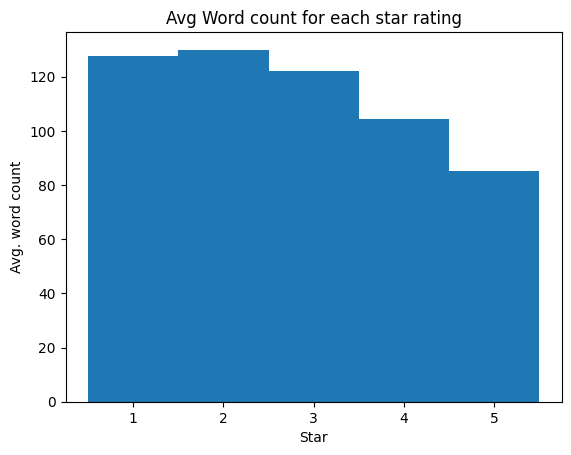

In [ ]:
x_star_reviews = x_star_avg.toPandas()
x_star_reviews['stars'] = x_star_reviews['stars'].astype(float)
x_star_reviews['avg(wordCount)'] = x_star_reviews['avg(wordCount)'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(x_star_reviews['stars'], x_star_reviews['avg(wordCount)'], width=1, linewidth = 0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('Avg Word count for each star rating')
plt.xlabel('Star')
plt.ylabel('Avg. word count')

plt.show()

In [ ]:
x.groupBy("name","stars").count().orderBy(col('name').asc(), col('stars').asc()).show(30)

+--------------------+-----+-----+
|                name|stars|count|
+--------------------+-----+-----+
|                null| null|    1|
|"No Macarena" DJ ...|  5.0|    4|
|      $1.99 Cleaners|  5.0|    1|
|         '81 Barbers|  5.0|    1|
|              'feine|  1.0|    1|
|              'feine|  2.0|    3|
|              'feine|  3.0|    6|
|              'feine|  4.0|   10|
|              'feine|  5.0|   31|
|           +1 Gaming|  5.0|    1|
|        1 Stop Pizza|  5.0|    1|
|    1 Tippling Place|  1.0|    2|
|    1 Tippling Place|  2.0|    5|
|    1 Tippling Place|  3.0|   14|
|    1 Tippling Place|  4.0|   47|
|    1 Tippling Place|  5.0|   59|
|1-275 Rest Area M...|  4.0|    1|
|1-275 Rest Area M...|  5.0|    1|
|1-800-GOT-JUNK? N...|  5.0|    4|
|1-800-GOT-JUNK? S...|  1.0|    1|
|1-800-GOT-JUNK? S...|  5.0|    4|
|   1-Hour Auto Glass|  5.0|    6|
|101 Taiwanese Cui...|  1.0|   17|
|101 Taiwanese Cui...|  2.0|   20|
|101 Taiwanese Cui...|  3.0|   48|
|101 Taiwanese Cui..

In [ ]:
r = x.groupBy("name","stars").count().orderBy(col('name').asc(), col('stars').asc())

In [ ]:
r.filter(r.stars <= 5.0).groupBy('name').pivot('stars').sum('count').fillna(0).orderBy(col('name').asc()).show()

+--------------------+---+---+---+---+---+
|                name|1.0|2.0|3.0|4.0|5.0|
+--------------------+---+---+---+---+---+
|"No Macarena" DJ ...|  0|  0|  0|  0|  4|
|      $1.99 Cleaners|  0|  0|  0|  0|  1|
|         '81 Barbers|  0|  0|  0|  0|  1|
|              'feine|  1|  3|  6| 10| 31|
|           +1 Gaming|  0|  0|  0|  0|  1|
|        1 Stop Pizza|  0|  0|  0|  0|  1|
|    1 Tippling Place|  2|  5| 14| 47| 59|
|1-275 Rest Area M...|  0|  0|  0|  1|  1|
|1-800-GOT-JUNK? N...|  0|  0|  0|  0|  4|
|1-800-GOT-JUNK? S...|  1|  0|  0|  0|  4|
|   1-Hour Auto Glass|  0|  0|  0|  0|  6|
|101 Taiwanese Cui...| 17| 20| 48|131|185|
| 10th Street Italian|  0|  0|  1|  4|  0|
| 12 South Inn Suites|  0|  0|  0|  0|  2|
|12 South Winter W...|  0|  0|  0|  0|  8|
|       12 South Yoga|  0|  0|  0|  0|  8|
|      1200 Chophouse|  5|  4|  8| 30| 88|
|    124 Grand Market|  0|  0|  1|  2|  3|
|       12th & Porter|  4|  1|  3|  4|  7|
|1501 Linden Manor...|  0|  0|  1|  1|  6|
+----------

In [ ]:
x.filter(x.name == "Luke").groupBy("name","stars").count().orderBy(col('count').desc()).show(10)

+----+-----+-----+
|name|stars|count|
+----+-----+-----+
|Luke|  5.0|  885|
|Luke|  4.0|  566|
|Luke|  3.0|  238|
|Luke|  2.0|  108|
|Luke|  1.0|   73|
+----+-----+-----+



In [ ]:
r = x.groupBy("name","stars","city","postal_code").count().orderBy(col('name').asc(), col('stars').asc())

In [ ]:
r.filter(r.stars <= 5.0).groupBy('name',"city","postal_code").pivot('stars').sum('count').fillna(0).orderBy(col('name').asc()).show()

+--------------------+--------------+-----------+---+---+---+---+---+
|                name|          city|postal_code|1.0|2.0|3.0|4.0|5.0|
+--------------------+--------------+-----------+---+---+---+---+---+
|"No Macarena" DJ ...|  Philadelphia|      19118|  0|  0|  0|  0|  4|
|      $1.99 Cleaners|          Lutz|      33559|  0|  0|  0|  0|  1|
|         '81 Barbers|        Tucson|      85705|  0|  0|  0|  0|  1|
|              'feine|  Conshohocken|      19428|  1|  3|  6| 10| 31|
|           +1 Gaming|      Metairie|      70001|  0|  0|  0|  0|  1|
|        1 Stop Pizza|  Philadelphia|      19140|  0|  0|  0|  0|  1|
|    1 Tippling Place|  Philadelphia|      19103|  2|  5| 14| 47| 59|
|1-275 Rest Area M...|    Terra Ceia|      34250|  0|  0|  0|  1|  1|
|1-800-GOT-JUNK? N...|     Westville|      08093|  0|  0|  0|  0|  4|
|1-800-GOT-JUNK? S...|   Saint Louis|      63130|  1|  0|  0|  0|  4|
|   1-Hour Auto Glass|        Tucson|      85742|  0|  0|  0|  0|  6|
|101 Taiwanese Cui..

In [ ]:
r = x.groupBy('state',"stars").count()

In [ ]:
state_stars = r.filter(r.stars <= 5.0).groupBy('state').pivot('stars').sum('count').fillna(0).orderBy(col('state').asc())
# state_stars.select(col("state").alias("states")).show()

state_stars = state_stars.withColumnRenamed("1.0","star_1").withColumnRenamed("2.0","star_2").withColumnRenamed("3.0","star_3").withColumnRenamed("4.0","star_4").withColumnRenamed("5.0","star_5")

state_stars.show()

state_avg = state_stars.withColumn('Avg Rating',((state_stars.star_1 * 1 + state_stars.star_2 * 2 + state_stars.star_3 * 3 + state_stars.star_4 * 4 + state_stars.star_5 * 5)/(state_stars.star_1 + state_stars.star_2 + state_stars.star_3 + state_stars.star_4 + state_stars.star_5))).orderBy(col('Avg Rating').desc())
state_avg.show()

+-----+------+------+------+------+------+
|state|star_1|star_2|star_3|star_4|star_5|
+-----+------+------+------+------+------+
|   AB|   380|   339|   560|  1130|  1149|
|   AZ|  1222|   835|  1070|  2616|  5085|
|   CA|  1033|   634|   954|  2168|  5181|
|   CO|     0|     0|     5|     4|     1|
|   DE|   230|   126|   181|   364|   577|
|   FL|  3377|  2201|  2911|  6522| 13417|
|   HI|     1|     0|     0|     0|     3|
|   ID|   341|   221|   296|   560|  1344|
|   IL|   219|   120|   166|   315|   533|
|   IN|  1378|  1077|  1486|  3519|  5953|
|   LA|  2396|  1772|  2924|  6810| 12679|
|   MO|  1657|  1257|  1780|  4065|  6645|
|   NC|     3|     0|     0|     0|     2|
|   NJ|   994|   645|   781|  1624|  2755|
|   NV|  1196|   866|  1128|  2442|  5118|
|   PA|  5585|  4534|  6328| 14013| 21232|
|   TN|  2006|  1568|  2197|  4505|  7684|
+-----+------+------+------+------+------+



+-----+------+------+------+------+------+------------------+
|state|star_1|star_2|star_3|star_4|star_5|        Avg Rating|
+-----+------+------+------+------+------+------------------+
|   HI|     1|     0|     0|     0|     3|               4.0|
|   CA|  1033|   634|   954|  2168|  5181|3.9859578736208627|
|   LA|  2396|  1772|  2924|  6810| 12679| 3.963244422707949|
|   AZ|  1222|   835|  1070|  2616|  5085| 3.878001477650536|
|   NV|  1196|   866|  1128|  2442|  5118| 3.876279069767442|
|   IN|  1378|  1077|  1486|  3519|  5953| 3.864236188772087|
|   FL|  3377|  2201|  2911|  6522| 13417|3.8583438863092727|
|   ID|   341|   221|   296|   560|  1344|3.8490224475018104|
|   MO|  1657|  1257|  1780|  4065|  6645|3.8299143079719555|
|   TN|  2006|  1568|  2197|  4505|  7684|3.7958240534521157|
|   PA|  5585|  4534|  6328| 14013| 21232| 3.788768087905285|
|   NJ|   994|   645|   781|  1624|  2755|3.6620091189880863|
|   AB|   380|   339|   560|  1130|  1149|3.6545812254075325|
|   DE| 

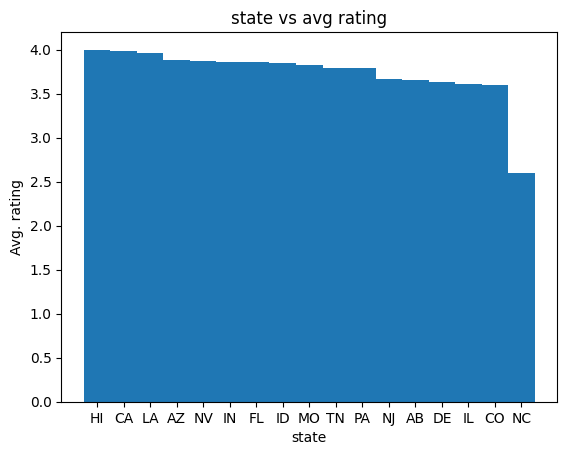

In [ ]:
state_avg_pd = state_avg.toPandas()

state_avg_pd['Avg Rating'] = state_avg_pd['Avg Rating'].astype(float)

# plot
fig, ax = plt.subplots()

ax.bar(state_avg_pd['state'], state_avg_pd['Avg Rating'], width=1, linewidth = 0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.title('state vs avg rating')
plt.xlabel('state')
plt.ylabel('Avg. rating')

plt.show()